In [2]:
import sys
import os
parent_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, parent_dir)
import src

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import glob

In [116]:
file = np.random.choice(glob.glob('../data/preprocessed/streaming*'))
file

'../data/preprocessed/streaming-pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102-0.csv'

In [117]:
df = pd.read_csv(file, index_col='ptime')
df.index = pd.to_timedelta(df.index)
#df

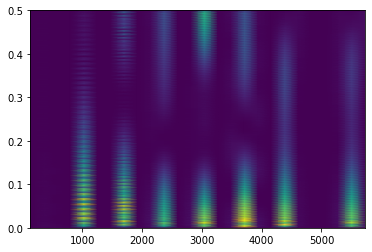

In [118]:
res = df.resample('50ms').sum()
f, t, Sxx = scipy.signal.spectrogram(res.psize, fs=1)
plt.pcolormesh(t, f, Sxx, shading='gouraud')

<AxesSubplot:xlabel='ptime'>

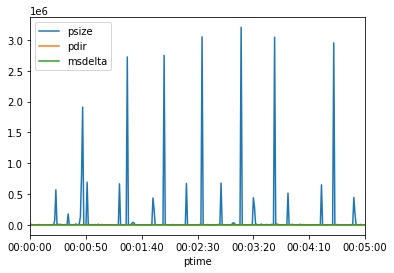

In [119]:
df.resample('1s').sum().plot()

<AxesSubplot:xlabel='ptime'>

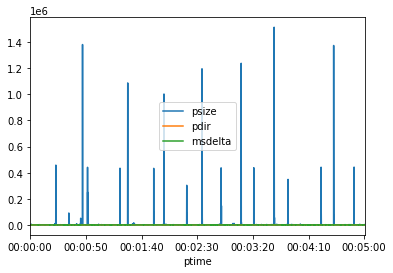

In [120]:
res.plot()

<AxesSubplot:xlabel='ptime'>

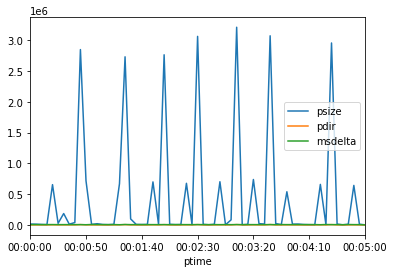

In [141]:
res = df.resample('5s').sum()
freqs = np.linspace(0.01, 3000000, 10000)
pgram = scipy.signal.lombscargle(res.index, res.psize, freqs, normalize=True)
res.plot()

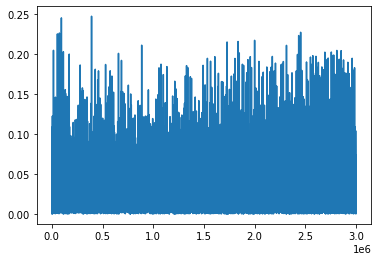

In [142]:
plt.plot(freqs, pgram)